In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass
from OrbitCOM import OrbitCOM # IN SEPARATE FILE

In [3]:
# TESTING
OrbitCOM('MW', 0, 5, 1)
# seems to have worked :)

0
1
2
3
4
5


In [4]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
gals = ['MW', 'M31', 'M33'] # the galaxies we want 

for galaxy in gals: # iterate over the galaxies
    print('Now on', galaxy)
    OrbitCOM(galaxy, 0, 800, 5) # make the COM data file for each

Now on MW
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
Now on M31
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470

In [5]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MW_data = np.genfromtxt('Orbit_MW.txt')
M31_data = np.genfromtxt('Orbit_M31.txt')
M33_data = np.genfromtxt('Orbit_M33.txt')

In [6]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

def vector_diff_mag(vec1, vec2):
    '''
    Computes the magnitude of the difference between
    two vectors.

    Parameters:
        vec1, vec2 : `ndarrays`
            vectors of equal dimensions whose 
            difference is to be found.
    Returns:
        vd_mag: `ndarray`
            the magnitude of the difference 
            between vec1 and vec2.
    '''
    # calculate the difference of the two vectors
    vec_diff = vec1 - vec2 
    # get the magnitude of the difference
    vd_mag = np.sqrt(np.sum(vec_diff**2, axis=1))

    return vd_mag

In [7]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
relp_MW31 = vector_diff_mag(MW_data[:,1:4], M31_data[:,1:4])*u.kpc
relv_MW31 = vector_diff_mag(MW_data[:,4:], M31_data[:,4:])*u.km/u.s
# of M33 and M31
relp_3133 = vector_diff_mag(M33_data[:,1:4], M31_data[:,1:4])*u.kpc
relv_3133 = vector_diff_mag(M33_data[:,4:], M31_data[:,4:])*u.km/u.s

In [8]:
# I prefer a serif font on my plots ¯\_(ツ)_/¯
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi'] = 115 # increase the resolution slightly

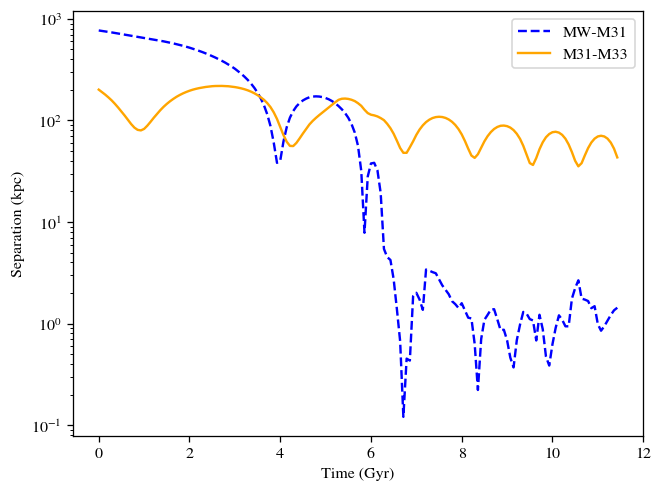

In [23]:
# Plot the Orbit of the galaxies 
#################################

fig, ax = plt.subplots()

time = MW_data[:,0] # time for the x-axis in Gyr

# MW-M31 orbit
ax.semilogy(time, relp_MW31, c='b', label='MW-M31',
        linestyle='--')
# M31-M33 orbit
ax.semilogy(time, relp_3133, c='orange', label='M31-M33')
#ax.set_xlim(5, 8)

ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Separation (kpc)')
ax.legend()

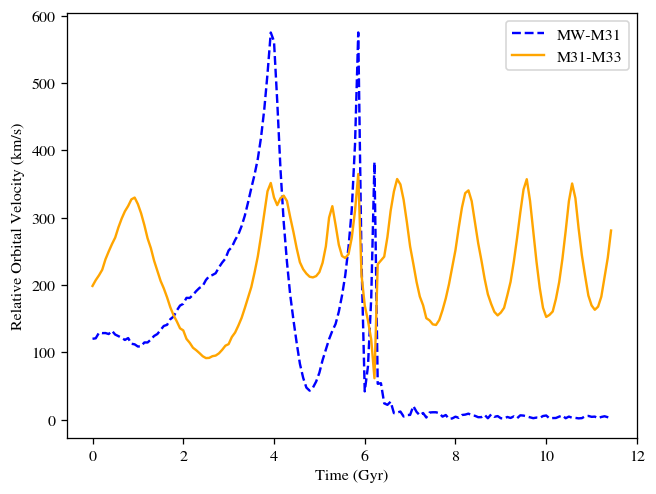

In [10]:
# Plot the orbital velocities of the galaxies 
#################################

fig, ax = plt.subplots()

# MW-M31 orbital velocities
ax.plot(time, relv_MW31, c='b', label='MW-M31',
        linestyle='--')
# M31-M33 orbital velocities
ax.plot(time, relv_3133, c='orange', label='M31-M33')

ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Relative Orbital Velocity (km/s)')
ax.legend()

# Questions

## 1)

The Milky Way and M31 will experience 2 close encounters in the future before merging.

## 2)
The time evolution of the velocity is inversely related to that of the separation, with the velocity peaking when the separation reaches a minimum and vice versa.

## 3)
M31 and the Milky Way merge at around 6.75 Gyr. After this, the orbit of M33 continues to shrink, but at a slower rate than before, almost stabilizing.

## 4)
The orbital decay rate of M33 is roughly -10.23 kpc/Gyr. If this rate is constant, M33 will merge with the MW+M31 remnant in about 7.33 Gyr.

In [ ]:
# for finding local maxima
from scipy.signal import find_peaks

In [51]:
# get indices of times after 6 Gyr
idxs = np.where(time>6)
# get the corresponding relative positions of M33
relp_M33_late = relp_3133[idxs]
# find the indices of the apocenters
# which are local maxima
apocenters = find_peaks(relp_M33_late)[0]
# get separations at apocenters
# and find the change in separation between them
apocenter_p = relp_M33_late[apocenters]
delp = np.diff(apocenter_p)
# now do the same with the time to find orbital periods
latetime = time[idxs]
apocenter_t = latetime[apocenters]
orbital_period = np.diff(apocenter_t)

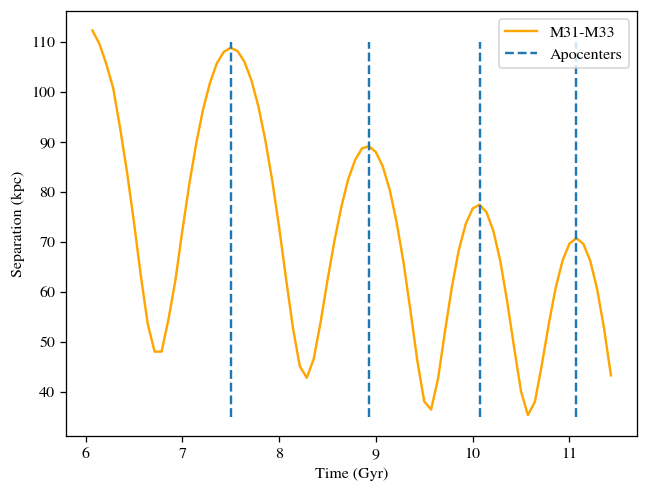

In [ ]:
# Plotting the orbit of M33 with lines at the apocenters
# just to check everything makes sense

fig, ax = plt.subplots()

# M31-M33 orbit
ax.plot(latetime, relp_M33_late, c='orange', label='M31-M33')
ax.vlines(latetime[apocenters], 35, 110, 
          label='Apocenters', linestyles='--')

ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Separation (kpc)')
ax.legend()

In [ ]:
# calculate the decay rates(s)!
decay_rates = delp/(orbital_period*u.Gyr)
decay_rates

<Quantity [-13.76923002, -10.21697158,  -6.70687834] kpc / Gyr>

In [60]:
# get the average decay rate
decay_rate_avg = np.mean(decay_rates)
print(f'Average orbital decay rate of M33 is {decay_rate_avg:.2f}')

Average orbital decay rate of M33 is -10.23 kpc / Gyr


In [56]:
# calulate merger time of M33 with the remnant
dist_M33 = 75.0*u.kpc
time_to_merge = -dist_M33/decay_rate_avg
print(f'Time for M33 merger is {time_to_merge:.2f}')

Time for M33 merger is 7.33 Gyr
